<a href="https://colab.research.google.com/github/dhikaha/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

Context :
This data set is created only for the learning purpose of the customer segmentation concepts , also known as market basket analysis . I will demonstrate this by using unsupervised ML technique (KMeans Clustering Algorithm) in the simplest form.

Content :
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

Problem Statement :
You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

## Importing libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

data : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [32]:
df = pd.read_csv('/content/drive/MyDrive/Data_Bootcamp_ds_myskill/Mall_Customers.csv')

## Reading and understanding Data

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [34]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [35]:
df = df.set_index(['CustomerID'])

In [36]:
mapping = { "Gender" : {"Male":0, "Female":1}} 
df.replace(mapping, inplace=True)

In [37]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [38]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [39]:
df.nunique()

Gender                     2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

In [40]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Pairploting of Data

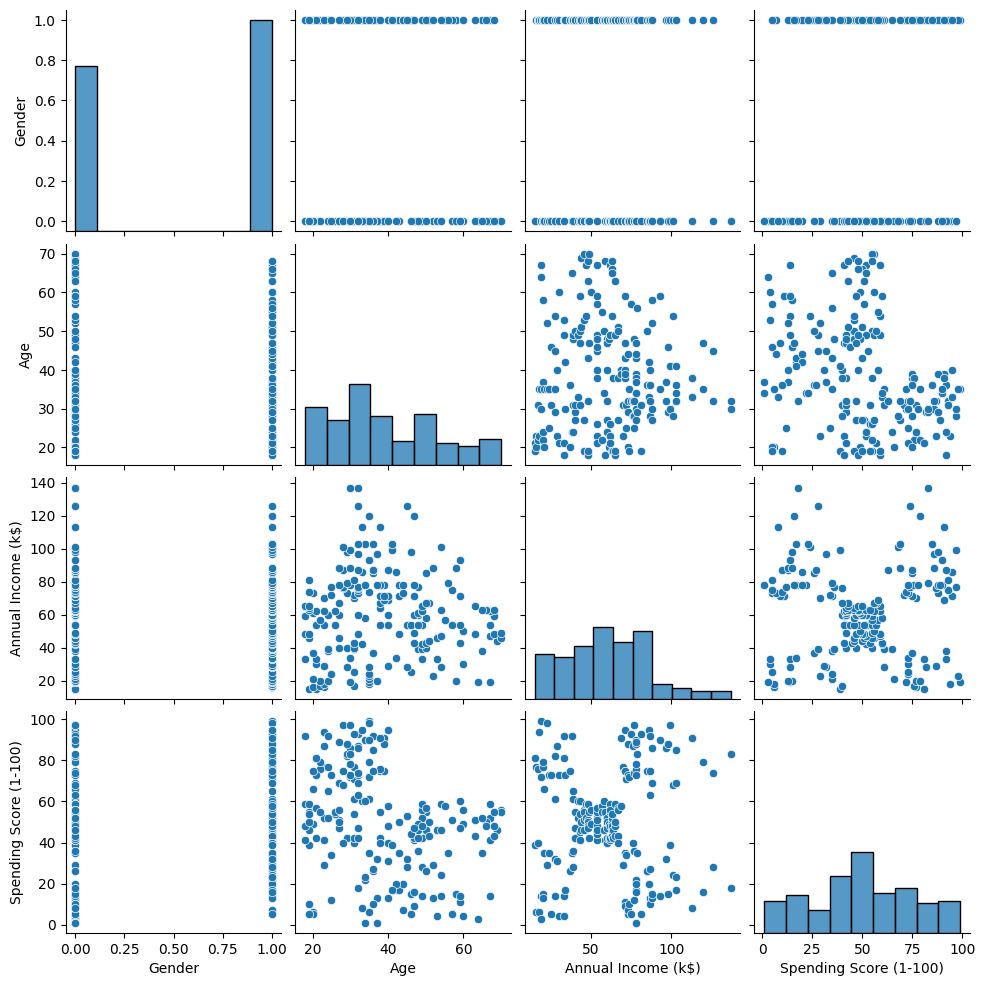

In [41]:
sns.pairplot(df)

## Correlation Matrix

In [42]:
df.corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


<Axes: >

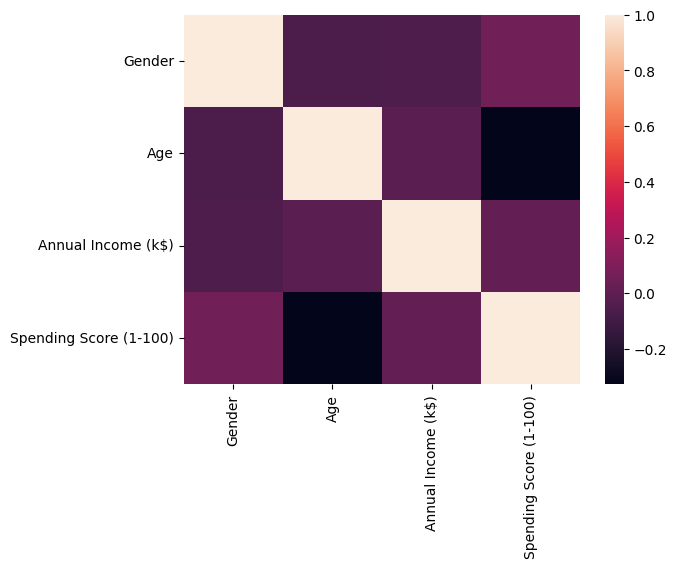

In [43]:
sns.heatmap(df.corr())

By looking at Correlation matrix we can see that Age and Spending score are more linearly correlated than any other feature and Annual Income and Spending score are not at all linearly correlated

## Building Elbow method graph for identifying number of clusters

In [44]:
## Building The Elbow Method Graph with full data
wcss = []
for i in range(2,10):
    kmeans = KMeans(i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58350.65449462818,
 51203.75391673207,
 44359.634641148325,
 40649.641024531025]

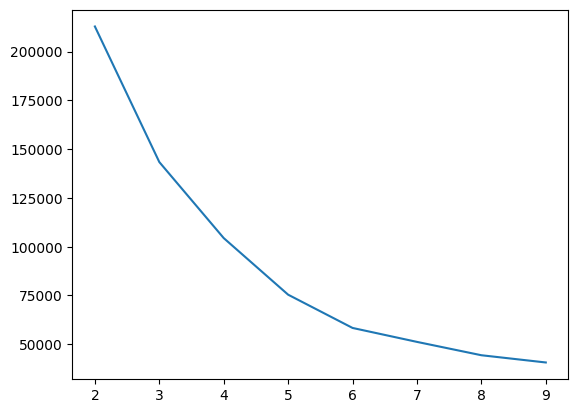

In [45]:
plt.plot(range(2,10), wcss)

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

sil = []
# Number of clusters in range 2-20
K = range(2, 10)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(df)
    labels = algorithm.labels_
    sil.append(silhouette_score(df, labels, metric = 'euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [47]:
sil

[0.29307334005502633,
 0.383798873822341,
 0.40553486600451777,
 0.443430209791173,
 0.45205475380756527,
 0.4400035911705477,
 0.4277721345758326,
 0.3839265296322716]

In [49]:
kmeans = KMeans(5)
kmeans.fit(df)
clusters = df.copy()
clusters['prediction'] = kmeans.fit_predict(df)
clusters[:15]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Gender,Age,Annual Income (k$),Spending Score (1-100),prediction
CustomerID,,,,,
1,0,19,15,39,4
2,0,21,15,81,2
3,1,20,16,6,4
4,1,23,16,77,2
5,1,31,17,40,4
6,1,22,17,76,2
7,1,35,18,6,4
8,1,23,18,94,2
9,0,64,19,3,4


Text(0.5, 0, 'Spending Score (1-100)')

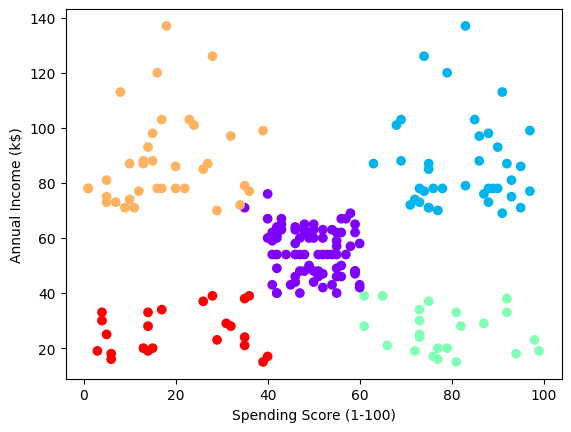

In [50]:
plt.scatter(df['Spending Score (1-100)'],df['Annual Income (k$)'], c= clusters['prediction'], cmap='rainbow')
plt.ylabel('Annual Income (k$)')
plt.xlabel('Spending Score (1-100)')

In [51]:
clusters.groupby('prediction').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
prediction,,,,
0,0.582278,43.088608,55.291139,49.569620
1,0.538462,32.692308,86.538462,82.128205
2,0.608696,25.521739,26.304348,78.565217
3,0.472222,40.666667,87.750000,17.583333
4,0.608696,45.217391,26.304348,20.913043
